# Predicting Companies Bankruptcy

### Data Set Information:

**The dataset is about bankruptcy prediction of Polish companies**

The data was collected from Emerging Markets Information Service (EMIS, [Web Link]), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:

- 1stYear: the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.

- 2ndYear: the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.

- 3rdYear: the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.

- 4thYear: the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.

- 5thYear: the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.

### Features description

- X1	net profit / total assets
- X2	total liabilities / total assets 
- X3	working capital / total assets 
- X4	current assets / short-term liabilities 
- X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 
- X6	retained earnings / total assets 
- X7	EBIT / total assets 
- X8	book value of equity / total liabilities 
- X9	sales / total assets 
- X10	equity / total assets 
- X11	(gross profit + extraordinary items + financial expenses) / total assets 
- X12	gross profit / short-term liabilities 
- X13	(gross profit + depreciation) / sales 
- X14	(gross profit + interest) / total assets 
- X15	(total liabilities * 365) / (gross profit + depreciation) 
- X16	(gross profit + depreciation) / total liabilities 
- X17	total assets / total liabilities 
- X18	gross profit / total assets 
- X19	gross profit / sales 
- X20	(inventory * 365) / sales 
- X21	sales (n) / sales (n-1) 
- X22	profit on operating activities / total assets 
- X23	net profit / sales 
- X24	gross profit (in 3 years) / total assets 
- X25	(equity - share capital) / total assets 
- X26	(net profit + depreciation) / total liabilities 
- X27	profit on operating activities / financial expenses 
- X28	working capital / fixed assets 
- X29	logarithm of total assets 
- X30	(total liabilities - cash) / sales 
- X31	(gross profit + interest) / sales 
- X32	(current liabilities * 365) / cost of products sold 
- X33	operating expenses / short-term liabilities 
- X34	operating expenses / total liabilities 
- X35	profit on sales / total assets 
- X36	total sales / total assets 
- X37	(current assets - inventories) / long-term liabilities 
- X38	constant capital / total assets 
- X39	profit on sales / sales 
- X40	(current assets - inventory - receivables) / short-term liabilities 
- X41	total liabilities / ((profit on operating activities + depreciation) * (12/365)) 
- X42	profit on operating activities / sales 
- X43	rotation receivables + inventory turnover in days 
- X44	(receivables * 365) / sales 
- X45	net profit / inventory 
- X46	(current assets - inventory) / short-term liabilities 
- X47	(inventory * 365) / cost of products sold 
- X48	EBITDA (profit on operating activities - depreciation) / total assets 
- X49	EBITDA (profit on operating activities - depreciation) / sales 
- X50	current assets / total liabilities 
- X51	short-term liabilities / total assets 
- X52	(short-term liabilities * 365) / cost of products sold) 
- X53	equity / fixed assets 
- X54	constant capital / fixed assets 
- X55	working capital 
- X56	(sales - cost of products sold) / sales 
- X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) 
- X58	total costs /total sales 
- X59	long-term liabilities / equity 
- X60	sales / inventory 
- X61	sales / receivables 
- X62	(short-term liabilities *365) / sales 
- X63	sales / short-term liabilities 
- X64	sales / fixed assets

In [4]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.arff import loadarff

## 0. Data Preparation

In [5]:
# Loading data objects from arff file
data_objects = []
for i in range(1,6):
    i = str(i)
    file_name = i+'year.arff'
    data_objects.append(loadarff('./data/bankruptcy/'+i+'year.arff'))

In [8]:
# Creating the dataframes
df_list = [pd.DataFrame.from_records(data=x[0]) for x in data_objects]
companies = pd.concat(df_list, axis=0) 
column_names = ['x'+str(i) for i in range(1,65)] + ['bankrupt']
column_names = {k:v for (k,v) in zip(companies.columns, column_names)}
companies.rename(columns=column_names, inplace=True)
companies['bankrupt'] = companies['bankrupt'].astype('int')
companies.shape

(43405, 65)

In [9]:
# Dealing with missing values, this is just a quick way for demonstration purposes
# in reality we must be more careful
nas_by_feature = companies.isnull().sum(axis=0)
# Droping features with more than 2000 missing values
features_to_drop = nas_by_feature[nas_by_feature>2000].index
companies.drop(features_to_drop, axis=1, inplace=True)
companies.fillna(companies.median(), inplace=True)
# No missing values!
#companies.isnull().sum(axis=0).sum()
companies.shape

(43405, 60)

In [11]:
companies.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x61,x62,x63,x64,bankrupt
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,4.3158,127.210,2.8692,7.8980,0


In [12]:
# This is an example of an unbalanced classification problem
# Normalize and *100 to show percentage of datapoints having each class
100*companies['bankrupt'].value_counts(normalize=True)

0    95.182583
1     4.817417
Name: bankrupt, dtype: float64

# Predicting Bankruptcy (using unbalanced classes)

### Getting the train and test sets

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [15]:
def CMatrix(CM, labels=['operating','bankrupt']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

### Preparing metrics DataFrame

In [16]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'], 
                      columns=['NULL', 'LogisticReg', 'ClassTree', 'NaiveBayes'])

- **Accuracy**: the proportion of the total number of predictions that are correct
- **Precision**: the proportion of positive predictions that are actually correct
- **Recall**: the proportion of positive observed values correctly predicted as such

**In this application:**
- **Accuracy**: Overall, how often the classifier is correct
- **Precision: Proportion of bankruptcy predictions that are actually correct**
- **Recall**: Proportion of bankrupted companies that the classifier actually identifies

In [17]:
target_name = 'bankrupt'
robust_scaler = RobustScaler()
X = companies.drop('bankrupt', axis=1)
X = robust_scaler.fit_transform(X)
y = companies[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

## The Null model: always predict the most common category

In [18]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,8263,0,8263
bankrupt,418,0,418
Total,8681,0,8681


## A. Logistic Regression

In [19]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
# A lot of datapoints so to prevent overfitting use C=10 as regularization
logistic_regression = LogisticRegression(C=10, n_jobs=-1, random_state=15)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,8191,72,8263
bankrupt,406,12,418
Total,8597,84,8681


## B. Classification Trees

In [20]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier

# 2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(max_depth=7, random_state=10)

# 3. Use the trainning data to train the estimator
class_tree.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,8212,51,8263
bankrupt,344,74,418
Total,8556,125,8681


## C. Naive Bayes Classifier

In [23]:
# 1. Import the estimator object (model). Use Gaussian because most features are continous
from sklearn.naive_bayes import GaussianNB
# 2. Create an instance of the estimator
NBC = GaussianNB()
# 3. Use the trainning data to train the estimator
NBC.fit(X_train, y_train)
# 4. Evaluate the model
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,136,8127,8263
bankrupt,16,402,418
Total,152,8529,8681


In [24]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,95.1849,94.4937,95.4498,6.19744
precision,0,14.2857,59.2,4.71333
recall,0,2.87081,17.7033,96.1722


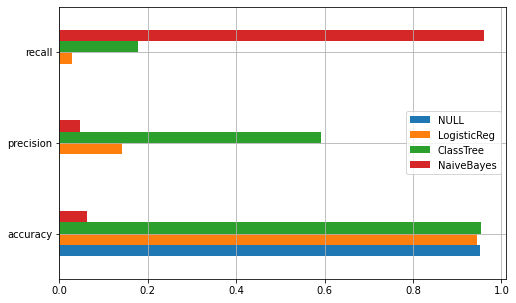

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [26]:
class_tree.predict(X_test[0:5])

array([0, 0, 0, 0, 0])

## Predicting Bankrupcy: undersamplig the majority class

In [27]:
# Select a small amount of data points from the majority class 
negative_cases = companies.loc[companies['bankrupt']==0].sample(n=4000)
positive_cases = companies.loc[companies['bankrupt']==1]
companies = pd.concat([negative_cases, positive_cases])

In [28]:
companies['bankrupt'].value_counts()

0    4000
1    2091
Name: bankrupt, dtype: int64

In [29]:
# Create new datasets
target_name = 'bankrupt'
robust_scaler = RobustScaler()
X = companies.drop('bankrupt', axis=1)
X = robust_scaler.fit_transform(X)
y = companies[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=125, stratify=y)

# Redo all models

## The Null model: always predict the most common category

In [30]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,801,0,801
bankrupt,418,0,418
Total,1219,0,1219


## A. Logistic Regression

In [31]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
logistic_regression = LogisticRegression(C=10, n_jobs=-1, random_state=15)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,581,220,801
bankrupt,161,257,418
Total,742,477,1219


## B. Classification Trees

In [32]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier

# 2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(max_depth=7, random_state=10)

# 3. Use the trainning data to train the estimator
class_tree.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,639,162,801
bankrupt,164,254,418
Total,803,416,1219


## C. Naive Bayes Classifier

In [33]:
# 1. Import the estimator object (model)
from sklearn.naive_bayes import GaussianNB
# 2. Create an instance of the estimator
NBC = GaussianNB()
# 3. Use the trainning data to train the estimator
NBC.fit(X_train, y_train)
# 4. Evaluate the model
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,22,779,801
bankrupt,8,410,418
Total,30,1189,1219


In [34]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,65.7096,68.7449,73.2568,35.4389
precision,0,53.8784,61.0577,34.4828
recall,0,61.4833,60.7656,98.0861


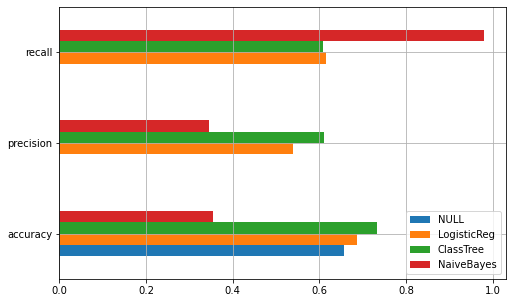

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [36]:
# Get feature names and feature importance from Classification Tree
feature_names = companies.drop('bankrupt', axis=1).columns
feat_importance = pd.Series(data=class_tree.feature_importances_, index=feature_names)

In [37]:
feat_importance.sort_values(ascending=False)[0:3]

x24    0.362730
x46    0.114551
x5     0.039738
dtype: float64

### Top 3 most important features: 
1. gross profit (in 3 years) / total assets
2. (current assets - inventory) / short-term liabilities
3.  [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

## Making predictions

In [38]:
from collections import OrderedDict

In [39]:
def individual_prediction(company_data):
    company_data = robust_scaler.transform(company_data.values.reshape(1, -1))
    prediction = class_tree.predict(company_data)[0]
    proba = class_tree.predict_proba(company_data)[0][0]
    #print(proba)
    #print(type(proba))
    if prediction == 0:
        return "Will be operating in 5 years (with {:0.2f}% chance)".format(100*proba)
    else:
        return "Will be bankrupt in 5 years (with {:0.2f}% chance)".format(100*(1-proba))

In [40]:
company_data = OrderedDict([
    ("x1", 0.033162), ("x2", 0.22283), ("x3", 0.37), ("x4", 4.4679), ("x5", 209.34), 
    ("x6", 0.0), ("x7", 0.046205), ("x8", 3.4878), ("x9", 0.64932), ("x10", 0.77717), 
    ("x11", 0.059273), ("x12", 0.43214), ("x13", 0.18681), ("x14", 0.046205), ("x15", 670.48), 
    ("x16", 0.54438), ("x17", 4.4878), ("x18", 0.046205), ("x19", 0.071159), ("x20", 23.396), 
    ("x22", 0.013612), ("x23", 0.051072), ("x24", 0.5), ("x25", 0.58292), ("x26", 0.48585), 
    ("x28", 0.70994), ("x29", 3.9291), ("x30", -0.033028), ("x31", 0.091285), ("x32", 61.596), 
    ("x33", 5.9257), ("x34", 2.8434), ("x35", 0.015735), ("x36", 0.64932), ("x38", 0.89308), 
    ("x39", 0.024234), ("x40", 2.3258), ("x41", 0.083729), ("x42", 0.020964), ("x43", 128.75), 
    ("x44", 105.35), ("x46", 4.0786), ("x47", 23.978), ("x48", -0.061485), ("x49", -0.094692), 
    ("x50", 2.1439), ("x51", 0.10692), ("x52", 0.16876), ("x53", 1.488), ("x54", 1.7099), 
    ("x55", 3149.5), ("x56", 0.024234), ("x57", 0.04267), ("x58", 0.93354), ("x59", 0.14914), 
    ("x61", 3.4646), ("x62", 60.103), ("x63", 6.0729), ("x64", 1.2432)
])

new_company_data = pd.Series(company_data)
individual_prediction(new_company_data)

'Will be operating in 5 years (with 98.03% chance)'

In [41]:
known_bankrupt_company = companies[companies['bankrupt']==1].iloc[3].drop('bankrupt')
individual_prediction(known_bankrupt_company)

'Will be bankrupt in 5 years (with 63.64% chance)'